### transformers:Nougat: Neural Optical Understanding for Academic Documents

Scientific knowledge is predominantly stored in books and scientific journals, often in the form of PDFs. However, the PDF format leads to a loss of semantic information, particularly for mathematical expressions. We propose Nougat (Neural Optical Understanding for Academic Documents), a Visual Transformer model that performs an Optical Character Recognition (OCR) task for processing scientific documents into a markup language, and demonstrate the effectiveness of our model on a new dataset of scientific documents. The proposed approach offers a promising solution to enhance the accessibility of scientific knowledge in the digital age, by bridging the gap between human-readable documents and machine-readable text. We release the models and code to accelerate future work on scientific text recognition.

* https://huggingface.co/facebook/nougat-base
* https://arxiv.org/abs/2308.13418
* https://github.com/facebookresearch/nougat
* https://facebookresearch.github.io/nougat/

In [1]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-to-text", model="facebook/nougat-base")

config.json:   0%|          | 0.00/4.77k [00:00<?, ?B/s]

c:\Users\prng\AppData\Local\anaconda3\envs\ford_etl\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\prng\.cache\huggingface\hub\models--facebook--nougat-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.40G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    896,
    672
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "qkv_bias": true,
  "transformers_version": "4.47.1",
  "use_absolute_embeddings": false,
  "window_size": 7
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "add_final_layer_norm": true

generation_config.json:   0%|          | 0.00/165 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.49k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.14M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

Device set to use cpu


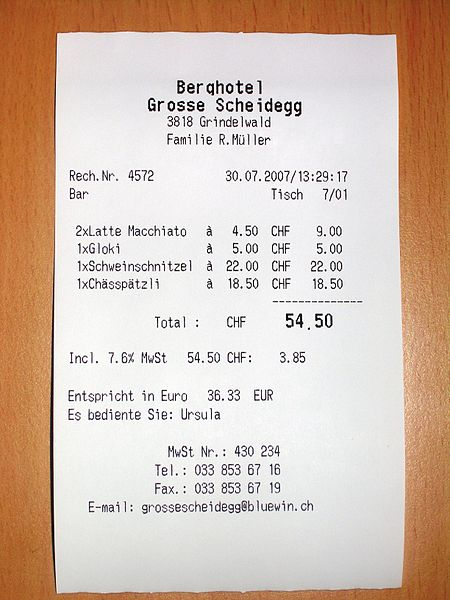

In [8]:
from PIL import Image
# Load an image
image_path =  "../receipt.png"
image = Image.open(image_path).convert("RGB")  # Ensure the image is in RGB format
image

In [11]:
image.size

(450, 600)

In [9]:
# Usar el pipeline para generar texto a partir de la imagen
result = pipe(image)

# Imprimir el texto generado
print(result[0]['generated_text'])

**Berqhotel**

**Grosse Scheidegg**

3


In [10]:
result

[{'generated_text': '**Berqhotel**\n\n**Grosse Scheidegg**\n\n3'}]

### nougat

* Step-by-step PDF transcription

https://huggingface.co/docs/transformers/main/model_doc/nougat

In [15]:
from huggingface_hub import hf_hub_download
import re
from PIL import Image

from transformers import NougatProcessor, VisionEncoderDecoderModel
import torch

processor = NougatProcessor.from_pretrained("facebook/nougat-base")
model = VisionEncoderDecoderModel.from_pretrained("facebook/nougat-base")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)


Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    896,
    672
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "qkv_bias": true,
  "transformers_version": "4.47.1",
  "use_absolute_embeddings": false,
  "window_size": 7
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "add_final_layer_norm": true

VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0): DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )

In [ ]:
from PIL import Image

# prepare PDF image for the model
filepath =  "../handwriting.png"
image = Image.open(filepath)
image.size

new_size = (image.size[0] //3, image.size[1] // 3)
image = image.resize(new_size)
image.size
#image

In [ ]:
pixel_values = processor(image, return_tensors="pt").pixel_values


In [ ]:
# generate transcription (here we only generate 30 tokens)
outputs = model.generate(
    pixel_values.to(device),
    min_length=1,
    max_new_tokens=30,
    bad_words_ids=[[processor.tokenizer.unk_token_id]],
)

sequence = processor.batch_decode(outputs, skip_special_tokens=True)[0]
sequence = processor.post_process_generation(sequence, fix_markdown=False)
# note: we're using repr here such for the sake of printing the \n characters, feel free to just print the sequence
print(repr(sequence))